<a href="https://colab.research.google.com/github/95871abhinandankumar/95871abhinandankumar/blob/main/ML_practiceLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
dataframe = pd.read_csv("Cricket_chirps.csv")

print(dataframe)

              X   Y
0     88.599998  19
1     71.599998  16
2     93.300003  22
3     84.300003  17
4     80.599998  19
...         ...  ..
1494  81.000000  17
1495  81.000000  17
1496  86.000000  17
1497  83.000000  20
1498  72.000000  16

[1499 rows x 2 columns]


In [6]:
a = 0.6

dataset1 = dataframe.copy()
train_dataset = dataset1.sample(frac = a)
dataset1 = dataset1.drop(train_dataset.index)

a = 0.5
validation_dataset = dataset1.sample(frac = a)
test_dataset = dataset1.drop(validation_dataset.index)


print("train_dataset.....")
print(train_dataset)

print("validation_dataset.....")
print(validation_dataset)


print("test_dataset.....")
print(test_dataset)

train_dataset.....
         X   Y
395   62.0  15
708   89.0  18
112   84.0  18
541   89.0  20
443   72.0  16
...    ...  ..
1122  90.0  21
398   62.0  14
661   88.0  18
1128  75.0  19
1216  68.0  15

[899 rows x 2 columns]
validation_dataset.....
         X   Y
526   82.0  17
308   76.0  18
111   88.0  20
237   82.0  19
507   85.0  21
...    ...  ..
1199  66.0  15
1132  63.0  16
547   67.0  17
1405  82.0  16
757   72.0  17

[300 rows x 2 columns]
test_dataset.....
              X   Y
3     84.300003  17
15    62.000000  13
23    66.000000  17
29    80.000000  20
32    81.000000  18
...         ...  ..
1473  82.000000  20
1479  76.000000  18
1485  87.000000  21
1486  85.000000  17
1496  86.000000  17

[300 rows x 2 columns]
train_dataset.....
        X   Y
494  71.0  16
666  63.0  16
482  71.0  17
627  75.0  18
464  62.0  14
..    ...  ..
674  85.0  19
912  86.0  20
530  62.0  15
654  90.0  20
343  62.0  15

[899 rows x 2 columns]
validation_dataset.....
         X   Y
648   74.0  18
37

In [50]:
import numpy as np


def MSE_ofGivenDataset(dataset):

  max1 = dataset['X'].max()
  max2 = dataset['Y'].max()


  learning_rates = [0.01, 0.001, 0.3, 0.5, 1]
  w0, w1 = 3, 3;
  #h = w0  + w1*x
  pre_j = 0
  epoch = 100
  p = 0.0000001
  dataset = dataset.to_numpy()

  #normalize the datset
  for i in range(len(dataset)):
    dataset[i][0] /= max1
    dataset[i][1] /= max2

  for lr in learning_rates:
    for itr  in range(epoch):
      j = 0
      m = len(dataset)
      temp1 = 0
      temp2 = 0
      #print("total datset..", m)
      for ind in range(len(dataset)):
        j = j + ((w0 + w1*dataset[ind][0]) - dataset[ind][1])**2
        temp1 = temp1 +  (((w0 + w1*dataset[ind][0]) - dataset[ind][1])*1)
        temp2 = temp2 + (((w0 + w1*dataset[ind][0]) - dataset[ind][1])*dataset[ind][0])
      
      j = j/(2*m)
      j = round(j, 8)
      w0 = w0 - (lr * temp1)/m
      w0 = round(w0, 8)
      w1 = w1 - (lr * temp2)/m
      w1 = round(w1, 8)
      #print("cofficient", w0, w1)

      if abs(pre_j - j) <= p or itr == epoch - 1:
        print("For learning rate", lr, "......")
        print("MSE =", j)
        break
      pre_j = j   


print("For Training dataset............")
MSE_ofGivenDataset(train_dataset)

print("\n\n\n\n\nFor validation dataset............")
MSE_ofGivenDataset(validation_dataset)

print("\n\n\n\n\nFor test dataset............")
MSE_ofGivenDataset(test_dataset)

For Training dataset............
For learning rate 0.01 ......
MSE = 0.3666682
For learning rate 0.001 ......
MSE = 0.25236141
For learning rate 0.3 ......
MSE = 0.00155728
For learning rate 0.5 ......
MSE = 0.00155727
For learning rate 1 ......
MSE = 0.00155727





For validation dataset............
For learning rate 0.01 ......
MSE = 0.37210873
For learning rate 0.001 ......
MSE = 0.25674014
For learning rate 0.3 ......
MSE = 0.00159754
For learning rate 0.5 ......
MSE = 0.00159751
For learning rate 1 ......
MSE = 0.00159748





For test dataset............
For learning rate 0.01 ......
MSE = 0.38774945
For learning rate 0.001 ......
MSE = 0.2695398
For learning rate 0.3 ......
MSE = 0.00154622
For learning rate 0.5 ......
MSE = 0.00154615
For learning rate 1 ......
MSE = 0.00154611


In [45]:
def MSE_givenLearningRate(dataset):

  max1 = dataset['X'].max()
  max2 = dataset['Y'].max()
  MSE_ofEachEpoch = []
  lr = 0.1
  w0, w1 = 3, 3;
  #h = w0  + w1*x
  epoch = 100
  dataset = dataset.to_numpy()

  #normalize the datset
  for i in range(len(dataset)):
    dataset[i][0] /= max1
    dataset[i][1] /= max2

  for itr  in range(epoch):
    j = 0
    m = len(dataset)
    temp1 = 0
    temp2 = 0
    #print("total datset..", m)
    for ind in range(len(dataset)):
      j = j + ((w0 + w1*dataset[ind][0]) - dataset[ind][1])**2
      temp1 = temp1 +  (((w0 + w1*dataset[ind][0]) - dataset[ind][1])*1)
      temp2 = temp2 + (((w0 + w1*dataset[ind][0]) - dataset[ind][1])*dataset[ind][0])
    
    j = j/(2*m)
    j = round(j, 8)
    w0 = w0 - (lr * temp1)/m
    w0 = round(w0, 8)
    w1 = w1 - (lr * temp2)/m
    w1 = round(w1, 8)
    MSE_ofEachEpoch.append(j)
    

  return MSE_ofEachEpoch

print(MSE_givenLearningRate(train_dataset))

[11.33160165, 7.76945585, 5.32724237, 3.65285644, 2.50489449, 1.71784973, 1.17825045, 0.80830022, 0.55466169, 0.38076666, 0.26154392, 0.17980459, 0.12376397, 0.08534241, 0.05900052, 0.04094048, 0.02855848, 0.02006936, 0.0142492, 0.01025889, 0.00752313, 0.00564748, 0.00436154, 0.00347989, 0.00287543, 0.00246101, 0.00217689, 0.00198209, 0.00184853, 0.00175697, 0.00169419, 0.00165115, 0.00162164, 0.00160141, 0.00158754, 0.00157803, 0.00157151, 0.00156703, 0.00156397, 0.00156187, 0.00156043, 0.00155944, 0.00155876, 0.00155829, 0.00155797, 0.00155775, 0.0015576, 0.0015575, 0.00155743, 0.00155738, 0.00155735, 0.00155732, 0.0015573, 0.00155729, 0.00155728, 0.00155728, 0.00155727, 0.00155727, 0.00155727, 0.00155727, 0.00155726, 0.00155726, 0.00155726, 0.00155726, 0.00155726, 0.00155726, 0.00155726, 0.00155726, 0.00155725, 0.00155725, 0.00155725, 0.00155725, 0.00155725, 0.00155725, 0.00155725, 0.00155725, 0.00155725, 0.00155724, 0.00155724, 0.00155724, 0.00155724, 0.00155724, 0.00155724, 0.0015

In [48]:
x_axis = [i for i in range(1, 101)]
print(x_axis)
y_axis = MSE_givenLearningRate(train_dataset)
print(y_axis)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[11.33160165, 7.76945585, 5.32724237, 3.65285644, 2.50489449, 1.71784973, 1.17825045, 0.80830022, 0.55466169, 0.38076666, 0.26154392, 0.17980459, 0.12376397, 0.08534241, 0.05900052, 0.04094048, 0.02855848, 0.02006936, 0.0142492, 0.01025889, 0.00752313, 0.00564748, 0.00436154, 0.00347989, 0.00287543, 0.00246101, 0.00217689, 0.00198209, 0.00184853, 0.00175697, 0.00169419, 0.00165115, 0.00162164, 0.00160141, 0.00158754, 0.00157803, 0.00157151, 0.00156703, 0.00156397, 0.00156187, 0.00156043, 0.00155944, 0.00155876, 0.00155829, 0.00155797, 0.00155775, 0.0015576, 0.0015575, 0.00155743, 0.00155738, 0.001557

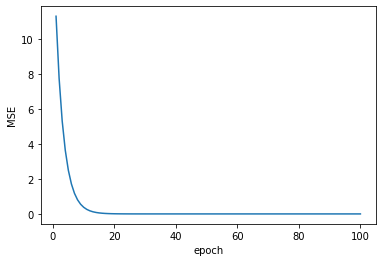

In [49]:
import matplotlib.pyplot as plt

plt.plot(x_axis, y_axis)

plt.xlabel('epoch')
plt.ylabel('MSE')

plt.show()